In [35]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D

In [57]:
#Generalidades
d = 0.20 # Separación de las bobinas (m)

BOBINA 1

In [58]:
# Definir parámetros
N1 = 4026 # Número de vueltas
R1 = 0.3 # Radio de las bobinas (m)
I1 = 0.025 # Corriente (A)
# Definir función para calcular el campo magnético de una bobina
def B_z1(x, y, z, a, b):
    # x, y, z: coordenadas del punto donde se quiere calcular el campo (m)
    # a, b: coordenadas del centro de la bobina (m)
    mu_0 = 4 * np.pi * 1e-7 # Permeabilidad magnética del vacío
    k = mu_0 * N1 * I1 / (2 * R1) # Constante
    # Función auxiliar para la integración
    def f(phi):
        return (R1**2) / (((x - a)**2 + (y - b)**2 + (z - R1 * np.sin(phi))**2)**(3/2))
    # Integrar la función auxiliar entre 0 y 2*pi
    integral, error = quad(f, 0, 2 * np.pi)
    # Multiplicar la integral por la constante
    return k * integral

BOBINA 2

In [59]:
# Definir parámetros
N2 = 4026 # Número de vueltas
R2 = 0.3 # Radio de las bobinas (m)
I2 = 0.025  # Corriente (A)
# Definir función para calcular el campo magnético de una bobina
def B_z2(x, y, z, a, b):
    # x, y, z: coordenadas del punto donde se quiere calcular el campo (m)
    # a, b: coordenadas del centro de la bobina (m)
    mu_0 = 4 * np.pi * 1e-7 # Permeabilidad magnética del vacío
    k = mu_0 * N2 * I2 / (2 * R2) # Constante
    # Función auxiliar para la integración
    def f(phi):
        return (R2**2) / (((x - a)**2 + (y - b)**2 + (z - R2 * np.sin(phi))**2)**(3/2))
    # Integrar la función auxiliar entre 0 y 2*pi
    integral, error = quad(f, 0, 2 * np.pi)
    # Multiplicar la integral por la constante
    return k * integral

BOBINA 3

In [60]:
# Definir parámetros
N3 = 4026 # Número de vueltas
R3 = 0.3 # Radio de las bobinas (m)
I3 = 0.025  # Corriente (A)
# Definir función para calcular el campo magnético de una bobina
def B_z3(x, y, z, a, b):
    # x, y, z: coordenadas del punto donde se quiere calcular el campo (m)
    # a, b: coordenadas del centro de la bobina (m)
    mu_0 = 4 * np.pi * 1e-7 # Permeabilidad magnética del vacío
    k = mu_0 * N3 * I3 / (2 * R3) # Constante
    # Función auxiliar para la integración
    def f(phi):
        return (R3**2) / (((x - a)**2 + (y - b)**2 + (z - R3 * np.sin(phi))**2)**(3/2))
    # Integrar la función auxiliar entre 0 y 2*pi
    integral, error = quad(f, 0, 2 * np.pi)
    # Multiplicar la integral por la constante
    return k * integral

BOBINA 4

In [61]:
# Definir parámetros
N4 = 4026 # Número de vueltas
R4 = 0.3 # Radio de las bobinas (m)
I4 = 0.025 # Corriente (A)
# Definir función para calcular el campo magnético de una bobina
def B_z4(x, y, z, a, b):
    # x, y, z: coordenadas del punto donde se quiere calcular el campo (m)
    # a, b: coordenadas del centro de la bobina (m)
    mu_0 = 4 * np.pi * 1e-7 # Permeabilidad magnética del vacío
    k = mu_0 * N4 * I4 / (2 * R4) # Constante
    # Función auxiliar para la integración
    def f(phi):
        return (R4**2) / (((x - a)**2 + (y - b)**2 + (z - R4 * np.sin(phi))**2)**(3/2))
    # Integrar la función auxiliar entre 0 y 2*pi
    integral, error = quad(f, 0, 2 * np.pi)
    # Multiplicar la integral por la constante
    return k * integral

In [62]:
# Definir el rango de valores para x e y
x = np.linspace(-d/5, d/5, 100)
y = np.linspace(-d/5, d/5, 100)
# Crear una malla de puntos
X, Y = np.meshgrid(x, y)

# Inicializar una matriz vacía para el campo magnético
B = np.empty(shape=[X.shape[0], Y.shape[1]], dtype=np.float64)

In [63]:
# Calcular el campo magnético en cada punto de la malla
for i in range(len(x)):
    for j in range(len(y)):
            # Sumar los campos de las 4 bobinas
            B[i, j] = B_z1(x[i], y[j],0, d/2, 0) + B_z2(x[i], y[j],0, -d/2, 0) + B_z3(x[i], y[j],0, 0, d/2) + B_z4(x[i], y[j],0, 0, -d/2)     

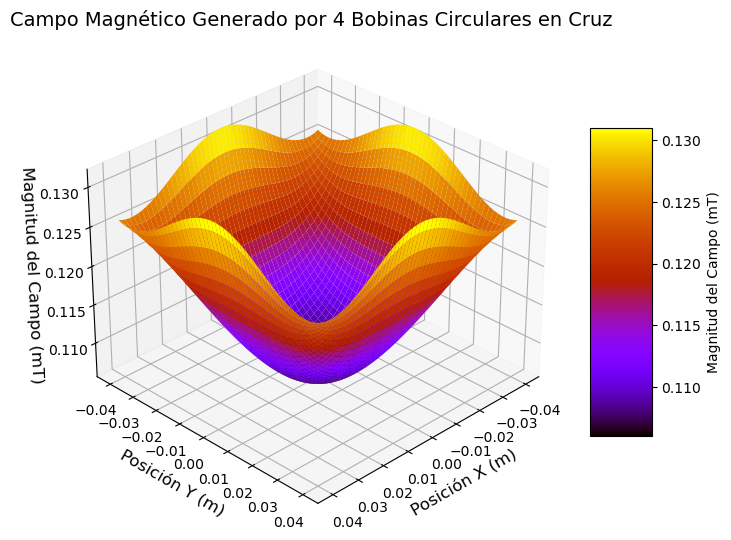

In [64]:
# Visualización del campo magnético 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Ajustes de la superficie
surf = ax.plot_surface(X, Y, B, cmap='gnuplot', linewidth=0, antialiased=True)

# Añadir barra de color con escala y unidades
norm = plt.Normalize(B.min(), B.max())
cbar = fig.colorbar(surf, shrink=0.5, aspect=5, norm=norm, label='Magnitud del Campo (mT)')
cbar.ax.tick_params(labelsize=10)

# Etiquetas, título y leyenda
ax.set_xlabel('Posición X (m)', fontsize=12)
ax.set_ylabel('Posición Y (m)', fontsize=12)
ax.set_zlabel('Magnitud del Campo (mT)', fontsize=12)
plt.title('Campo Magnético Generado por 4 Bobinas Circulares en Cruz', fontsize=14)

# Habilitar la interacción 3D y ajustar vista
ax.set_zlim(B.min(), B.max())
ax.view_init(30, 45)

# Mostrar la figura
plt.show()